In [1]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/FEM')
%load_ext autoreload

In [2]:
%autoreload 2
from FEMOL import RectangleQuadMesh, FEM_Problem, TOPOPT_Problem
from FEMOL_utils import *
import matplotlib.animation as animation
from IPython.display import display, clear_output

# Cantilever BeamTopology Optimization With Real Time Plot

### Topology optimization variables and mesh

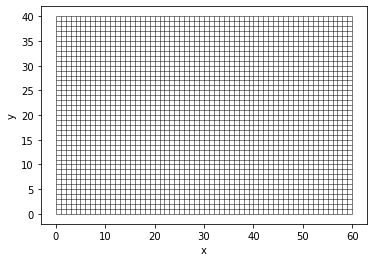

In [3]:
nelx = 60 # elements in the x direction
nely = 40 # elements in the y direction
volfrac = 0.35 # Volume fraction of material
penal = 3 # Penalization power

# Creating the mesh
Lx = nelx
Ly = nely

mesh = RectangleQuadMesh(Lx, Ly, nelx, nely)
mesh.plot()

## Defining the Cantilever Beam FEM problem

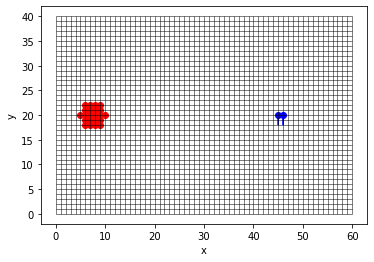

In [5]:
# distributing the material to the initial volume fraction
X = np.ones(nelx*nely)*volfrac  

# Creating the FEM Problem
Problem = FEM_Problem(mesh) # initialize the problem
E = 1
nu = 0.3
t = 1
Problem.isotropic_plane_stress_tensor(E, nu, t) # Define the stiffness tensor
Problem.plane_stress_Ke() # Get the element stiffness matrix (constant for every element)

# Fixed nodes on the left side

def fixed_circle(x, y):
    x_pos = Lx/8
    y_pos = Ly/2
    R = Ly/16
    
    if (x-x_pos)**2 + (y-y_pos)**2 <= R**2:
        return True
    else :
        return False

Problem.add_fixed_domain(fixed_circle)

# Domain where the down force is applied
x = [[6*Lx/8, 6*Lx/8+1]]
y = [[0.48*Ly, 0.52*Ly]]
force_domain = create_domain(x, y)

# Defining the force
force = [0, -1] #  Force = [Fx, Fy]

Problem.add_forces(force, force_domain)

Problem.assemble_1_material_topopt(X, penal)
Problem.fix_boundary()
Problem.plot()

## Solving the topology optimisation problem

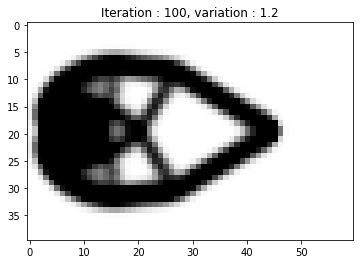

In [7]:
TO_Problem = TOPOPT_Problem(Problem, volfrac=0.30)
TO_Results = TO_Problem.solve(converge=0.01, solid_domain=fixed_circle)

In [ ]:
TO_Results.plot()

## Animating the results

In [ ]:
TO_Results.animate('Michel')